# WeatherPy
___


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List
---

In [2]:
# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for holding latitudes-longitudes and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1200)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1200)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    
    City = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to cities list
    
    if City not in cities:
        cities.append(City)
        
# Print the city count and cities list

print(f'\n{len(cities)} cities are selected.\n')
print(cities)


528 cities are selected.

['Nizhneyansk', 'Kapaa', 'Newala', 'Tuktoyaktuk', 'Busselton', 'Yerofey pavlovich', 'Rajpipla', 'Saldanha', 'Calvinia', 'Cape town', 'Durban', 'Ushuaia', 'Khatanga', 'Talnakh', 'Muros', 'Albany', 'Mataura', 'Vaini', 'Buluang', 'Kavieng', 'Hobart', 'Fortuna', 'Puerto ayora', 'Ribeira grande', 'Bluff', 'Rikitea', 'Mar del plata', 'Carnarvon', 'Souillac', 'Jerusalem', 'Bima', 'Avarua', 'Iqaluit', 'Saint-philippe', 'Ilulissat', 'Port alfred', 'Prince rupert', 'Jamestown', 'Green river', 'Clyde river', 'Mogadishu', 'Caravelas', 'Yellowknife', 'Torbay', 'Lebu', 'Cayenne', 'Cabo san lucas', 'Nikolskoye', 'Chokurdakh', 'Mwinilunga', 'East london', 'Tiarei', 'Saskylakh', 'Hilo', 'Havre-saint-pierre', 'Forssa', 'Richards bay', 'New norfolk', 'Gorontalo', 'Puerto escondido', 'Bathsheba', 'Cagayan de tawi-tawi', 'Barrow', 'Spencer', 'Airai', 'Jamame', 'San ramon', 'Rockland', 'Zhezkazgan', 'Longyearbyen', 'Tiksi', 'Punta arenas', 'Hermanus', 'Poum', 'Lompoc', 'Fairbanks'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

base_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q="


Cities_Data = []


for i, City in enumerate(cities):
    
    query_url = base_url + str(City) + "&appid=" + weather_api_key
    
    try:
        
        data = requests.get(query_url).json()
        
        Country = data['sys']['country']
        
        print(f'{i}. Processing data for {City}, {Country}')
        
        latitude = data["coord"]["lat"]
        
        longitude = data["coord"]["lon"]
        
        temperature = data["main"]["temp_max"]
        
        humidity = data["main"]["humidity"]
        
        Cloudiness = data["clouds"]["all"]
        
        Wind_speed = data["wind"]["speed"]
        
        Cities_Data.append({
                          "City" : City,
                          "Country" : Country,
                          "Latitude" : latitude,
                          "Longitude" : longitude,
                          "Max Temp" : temperature,
                          "Humidity" : humidity,
                          "Cloudiness" : Cloudiness,
                          "Wind Speed" : Wind_speed
                         })
        
    except:
        print(f'\n{i}. City - {City} is not found! Skipping.....\n')
        pass
    
              
# Indicate that Data Loading is complete

print("\n^^^^^^^^^^^^^^^^^^^^^^^^")
print("Data Retrieval Complete      ")
print("\n^^^^^^^^^^^^^^^^^^^^^^^^\n")


0. City - Nizhneyansk is not found! Skipping.....

1. Processing data for Kapaa, US
2. Processing data for Newala, TZ
3. Processing data for Tuktoyaktuk, CA
4. Processing data for Busselton, AU
5. Processing data for Yerofey pavlovich, RU
6. Processing data for Rajpipla, IN
7. Processing data for Saldanha, ZA
8. Processing data for Calvinia, ZA
9. Processing data for Cape town, ZA
10. Processing data for Durban, ZA
11. Processing data for Ushuaia, AR
12. Processing data for Khatanga, RU
13. Processing data for Talnakh, RU
14. Processing data for Muros, ES
15. Processing data for Albany, US
16. Processing data for Mataura, NZ
17. Processing data for Vaini, TO
18. Processing data for Buluang, PH
19. Processing data for Kavieng, PG
20. Processing data for Hobart, AU
21. Processing data for Fortuna, US
22. Processing data for Puerto ayora, EC
23. Processing data for Ribeira grande, PT
24. Processing data for Bluff, NZ
25. Processing data for Rikitea, PF
26. Processing data for Mar del pla

210. Processing data for Saint anthony, US
211. Processing data for Umm lajj, SA
212. Processing data for Ponta do sol, PT
213. Processing data for Emba, KZ
214. Processing data for Kaitangata, NZ
215. Processing data for Vanavara, RU
216. Processing data for North bend, US
217. Processing data for Mikropolis, GR
218. Processing data for Chapais, CA
219. Processing data for Polewali, ID
220. Processing data for Vila franca do campo, PT
221. Processing data for Mahebourg, MU
222. Processing data for Bairiki, KI
223. Processing data for Tazovskiy, RU
224. Processing data for Maniitsoq, GL

225. City - Illoqqortoormiut is not found! Skipping.....

226. Processing data for Synya, RU
227. Processing data for Port elizabeth, ZA
228. Processing data for Naze, JP
229. Processing data for Paamiut, GL
230. Processing data for Vanimo, PG
231. Processing data for Alofi, NU
232. Processing data for Kerema, PG
233. Processing data for Terney, RU
234. Processing data for Avera, US
235. Processing dat

418. Processing data for Brighton, GB
419. Processing data for Pirajui, BR
420. Processing data for College, US
421. Processing data for Manaure, CO
422. Processing data for Watertown, US
423. Processing data for Ormara, PK
424. Processing data for Sucre, BO
425. Processing data for Zelenoborskiy, RU
426. Processing data for Oktyabrskoye, RU
427. Processing data for Kiama, AU
428. Processing data for Turukhansk, RU
429. Processing data for Koumac, NC
430. Processing data for Cabedelo, BR
431. Processing data for Comodoro rivadavia, AR
432. Processing data for Shimoda, JP
433. Processing data for Ruteng, ID
434. Processing data for Yar-sale, RU
435. Processing data for Port moresby, PG
436. Processing data for Milos, GR
437. Processing data for Kidero, RU
438. Processing data for Kindia, GN
439. Processing data for Koulikoro, ML
440. Processing data for Asfi, MA
441. Processing data for Marzuq, YE
442. Processing data for Bonthe, SL
443. Processing data for Labuhan, ID
444. Processing d

### Convert Raw Data to DataFrame

* Display the DataFrame
* Export the city data into a .csv.

In [14]:
# Convert the data into Pandas DataFrame
Cities_Data_df = pd.DataFrame(Cities_Data)

Cities_Data_df = Cities_Data_df.dropna()

Cities_Data_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,22.08,-159.32,80.60,61,40,10.29
1,Newala,TZ,-10.94,39.28,64.76,100,41,4.14
2,Tuktoyaktuk,CA,69.45,-133.04,30.20,80,90,8.05
3,Busselton,AU,-33.65,115.33,48.00,98,68,25.50
4,Yerofey pavlovich,RU,53.97,121.97,43.09,57,1,0.69
...,...,...,...,...,...,...,...,...
483,Grand-santi,GF,4.25,-54.38,76.08,96,99,3.24
484,Yakeshi,CN,49.28,120.73,46.42,54,32,2.95
485,Kontagora,NG,10.40,5.47,86.97,42,15,3.62
486,Scottsbluff,US,41.87,-103.67,66.20,28,40,6.93


In [15]:
# Output File (CSV)
output_data_file = "Cities.csv"

# Export the City_Data into a csv
Cities_Data_df.to_csv(output_data_file, index_label="City_ID")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
# Extract relevant fields from the data frame

Latitudes = Cities_Data_df["Latitude"]
Longitudes = Cities_Data_df["Longitude"]
Temperatures = Cities_Data_df["Max Temp"]
Humudities = Cities_Data_df["Humidity"]
Cloudiness = Cities_Data_df["Cloudiness"]
Wind_speeds = Cities_Data_df["Wind Speed"]

#### Latitude vs. Temperature Plot

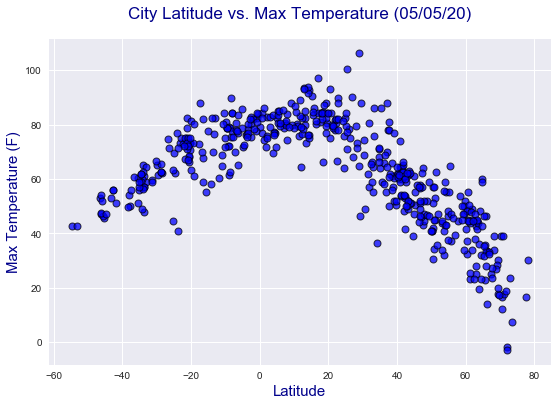

In [17]:
from matplotlib import style

style.use('seaborn')

# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(9, 6), facecolor = 'white')

plt.scatter(Latitudes, 
            Temperatures,
            facecolors = "blue",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities"
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"), 
          color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Max Temperature (F)", color = "darkblue", fontsize = 15)


plt.grid(True)

# Save the figure
plt.savefig("../Images/LatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

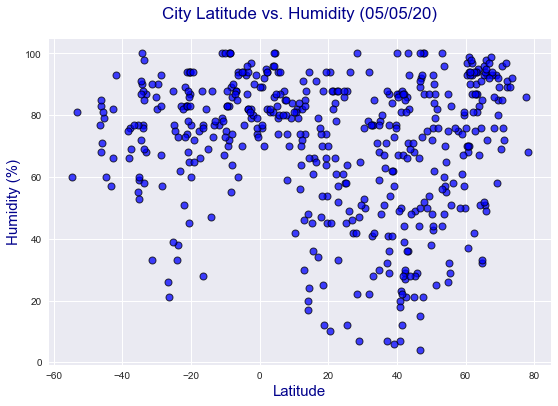

In [18]:
# Build a scatter plot for latitude vs. Humidity

plt.figure(figsize=(9,6), facecolor = 'white')

plt.scatter(Latitudes, 
            Humudities,
            facecolors = "b",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), 
          color = "darkblue", 
          fontsize = 17, 
          pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Humidity (%)", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatVsHumidity.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

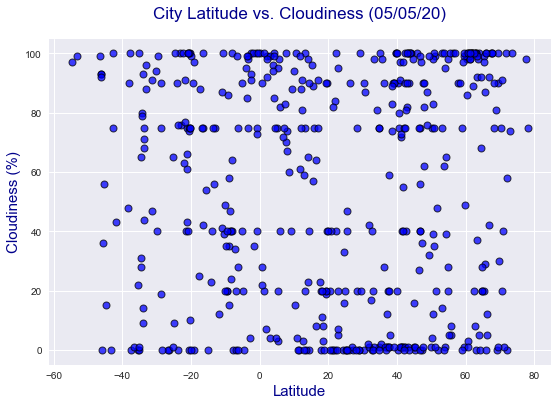

In [19]:
# Build a scatter plot for latitude vs. Cloudiness

plt.figure(figsize=(9,6),facecolor = 'white')

plt.scatter(Latitudes, 
            Cloudiness,
            facecolors = "blue",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Cloudiness (%)", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

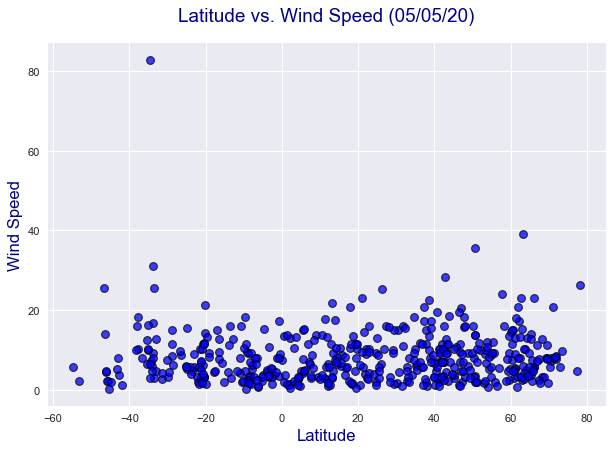

In [20]:
# Build a scatter plot for latitude vs. Wind Speed


plt.figure(figsize=(9,6), facecolor = 'white', dpi=80)

plt.scatter(Latitudes, 
            Wind_speeds,
            marker="o",
            facecolors = "b",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"), color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Wind Speed", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure

plt.savefig("../Images/LatVsWindSpd.png")

# Show plot

plt.show()


## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_reg_plot(x_values, y_values, title, x_label, y_label, line_eq_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    # Build the equation y = mx + c

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Build a scatter plot for the relevant fields
    
    plt.figure(figsize=(9,6))
    
    plt.scatter(x_values,y_values,
                facecolors = "blue",
                marker="o",
                edgecolor="darkblue",
                linewidths=1,  
                alpha=0.75)
    
    plt.plot(x_values,regress_values,"g-")
    
    # Incorporate the other graph properties
    
    plt.title(title, color = "darkblue", fontsize = 18, pad = 20)
    
    plt.xlabel(x_label, color = "darkblue", fontsize = 15)
    plt.ylabel(y_label, color = "darkblue", fontsize = 15)
    
    # Display the line equation on the map
    
    plt.annotate(line_eq, line_eq_coord, fontsize = 18, color = "darkblue")

    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']>=0]
Northern_hemi_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,22.08,-159.32,80.60,61,40,10.29
2,Tuktoyaktuk,CA,69.45,-133.04,30.20,80,90,8.05
4,Yerofey pavlovich,RU,53.97,121.97,43.09,57,1,0.69
5,Rajpipla,IN,21.87,73.50,81.86,66,0,4.09
11,Khatanga,RU,71.97,102.50,-1.66,89,0,8.57
...,...,...,...,...,...,...,...,...
483,Grand-santi,GF,4.25,-54.38,76.08,96,99,3.24
484,Yakeshi,CN,49.28,120.73,46.42,54,32,2.95
485,Kontagora,NG,10.40,5.47,86.97,42,15,3.62
486,Scottsbluff,US,41.87,-103.67,66.20,28,40,6.93


In [23]:
Southern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']<0]
Southern_hemi_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
1,Newala,TZ,-10.94,39.28,64.76,100,41,4.14
3,Busselton,AU,-33.65,115.33,48.00,98,68,25.50
6,Saldanha,ZA,-33.01,17.94,59.00,87,96,4.70
7,Calvinia,ZA,-31.47,19.78,59.54,33,91,2.71
8,Cape town,ZA,-33.93,18.42,64.99,88,93,9.17
...,...,...,...,...,...,...,...,...
476,Touros,BR,-5.20,-35.46,78.80,94,40,3.36
477,Flinders,AU,-34.58,150.86,62.01,91,28,3.00
479,Sao felix do xingu,BR,-6.64,-51.99,77.59,85,99,2.53
480,Omboue,GA,-1.57,9.26,78.48,90,35,4.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

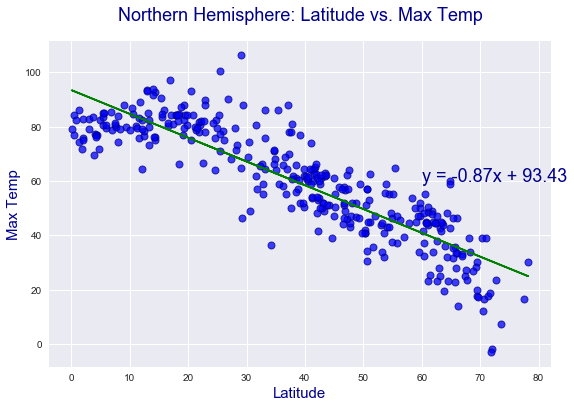

In [24]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Max Temp"],
                "Northern Hemisphere: Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (60,60))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

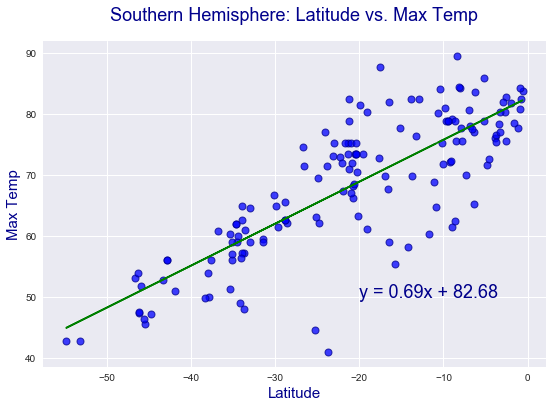

In [25]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Max Temp"],
                "Southern Hemisphere: Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (-20,50))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

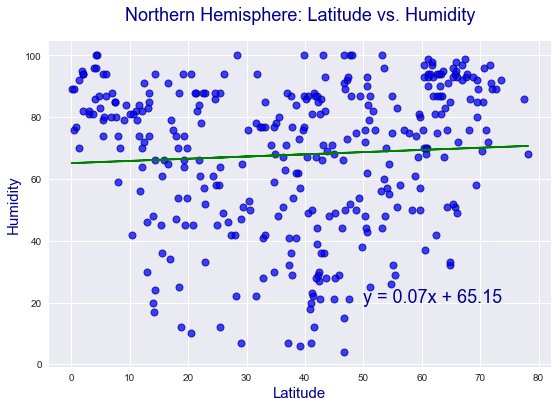

In [26]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Humidity"],
                "Northern Hemisphere: Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (50,20))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

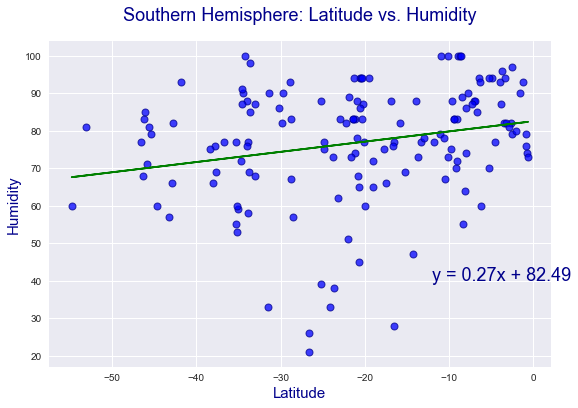

In [27]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Humidity"],
                "Southern Hemisphere: Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (-12,40))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

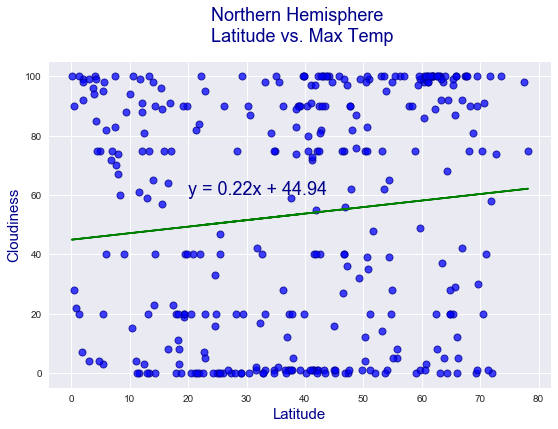

In [28]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Cloudiness"],
                "Northern Hemisphere \n Latitude vs. Max Temp",
                "Latitude",
                "Cloudiness",
                (20,60))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

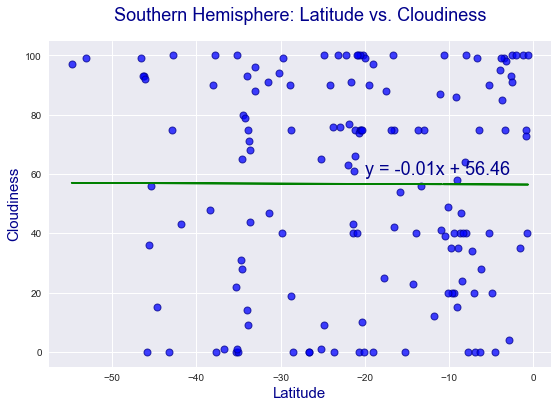

In [29]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Cloudiness"],
                "Southern Hemisphere: Latitude vs. Cloudiness",
                "Latitude",
                "Cloudiness",
                (-20,60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

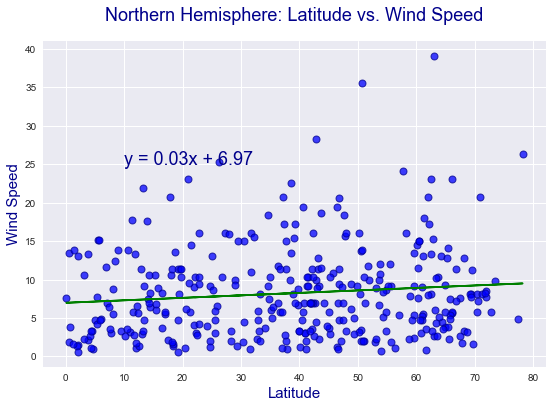

In [30]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Wind Speed"],
                "Northern Hemisphere: Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (10,25))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

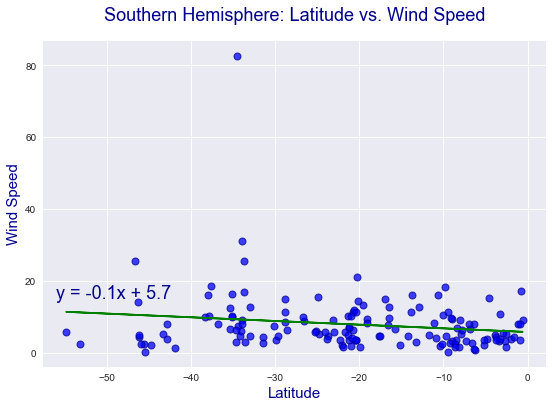

In [31]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Wind Speed"],
                "Southern Hemisphere: Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (-56,15))

In [33]:
# Read csv file named "sample" 
    
cities_data = pd.read_csv("Cities.csv")

cities_data.set_index("City_ID")  

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,
0,Kapaa,US,22.08,-159.32,80.60,61,40,10.29
1,Newala,TZ,-10.94,39.28,64.76,100,41,4.14
2,Tuktoyaktuk,CA,69.45,-133.04,30.20,80,90,8.05
3,Busselton,AU,-33.65,115.33,48.00,98,68,25.50
4,Yerofey pavlovich,RU,53.97,121.97,43.09,57,1,0.69
...,...,...,...,...,...,...,...,...
483,Grand-santi,GF,4.25,-54.38,76.08,96,99,3.24
484,Yakeshi,CN,49.28,120.73,46.42,54,32,2.95
485,Kontagora,NG,10.40,5.47,86.97,42,15,3.62


In [34]:
# Save as html file named as "Table" 
cities_data.to_html("Table.html") 
  
# assign it to a  
# variable (string) 
html_file = cities_data.to_html() 
html_file.split()

['<table',
 'border="1"',
 'class="dataframe">',
 '<thead>',
 '<tr',
 'style="text-align:',
 'right;">',
 '<th></th>',
 '<th>City_ID</th>',
 '<th>City</th>',
 '<th>Country</th>',
 '<th>Latitude</th>',
 '<th>Longitude</th>',
 '<th>Max',
 'Temp</th>',
 '<th>Humidity</th>',
 '<th>Cloudiness</th>',
 '<th>Wind',
 'Speed</th>',
 '</tr>',
 '</thead>',
 '<tbody>',
 '<tr>',
 '<th>0</th>',
 '<td>0</td>',
 '<td>Kapaa</td>',
 '<td>US</td>',
 '<td>22.08</td>',
 '<td>-159.32</td>',
 '<td>80.60</td>',
 '<td>61</td>',
 '<td>40</td>',
 '<td>10.29</td>',
 '</tr>',
 '<tr>',
 '<th>1</th>',
 '<td>1</td>',
 '<td>Newala</td>',
 '<td>TZ</td>',
 '<td>-10.94</td>',
 '<td>39.28</td>',
 '<td>64.76</td>',
 '<td>100</td>',
 '<td>41</td>',
 '<td>4.14</td>',
 '</tr>',
 '<tr>',
 '<th>2</th>',
 '<td>2</td>',
 '<td>Tuktoyaktuk</td>',
 '<td>CA</td>',
 '<td>69.45</td>',
 '<td>-133.04</td>',
 '<td>30.20</td>',
 '<td>80</td>',
 '<td>90</td>',
 '<td>8.05</td>',
 '</tr>',
 '<tr>',
 '<th>3</th>',
 '<td>3</td>',
 '<td>Busselton